In [1]:
import networkx as nx
import community as community_louvain
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from networkx.algorithms.community import label_propagation_communities
from networkx.algorithms.community import girvan_newman
plt.style.use('seaborn-v0_8-notebook')

In [2]:
file_path = "/Users/varangpratapsingh/Downloads/Graphs And SN/facebook_combined.txt"
G = nx.read_edgelist(file_path, create_using=nx.Graph(), nodetype=int)
print(f"Graph loaded with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

Graph loaded with 4039 nodes and 88234 edges.


Top 10 Nodes by Degree Centrality:
Node 107: 0.2588
Node 1684: 0.1961
Node 1912: 0.1870
Node 3437: 0.1355
Node 0: 0.0859
Node 2543: 0.0728
Node 2347: 0.0721
Node 1888: 0.0629
Node 1800: 0.0607
Node 1663: 0.0582




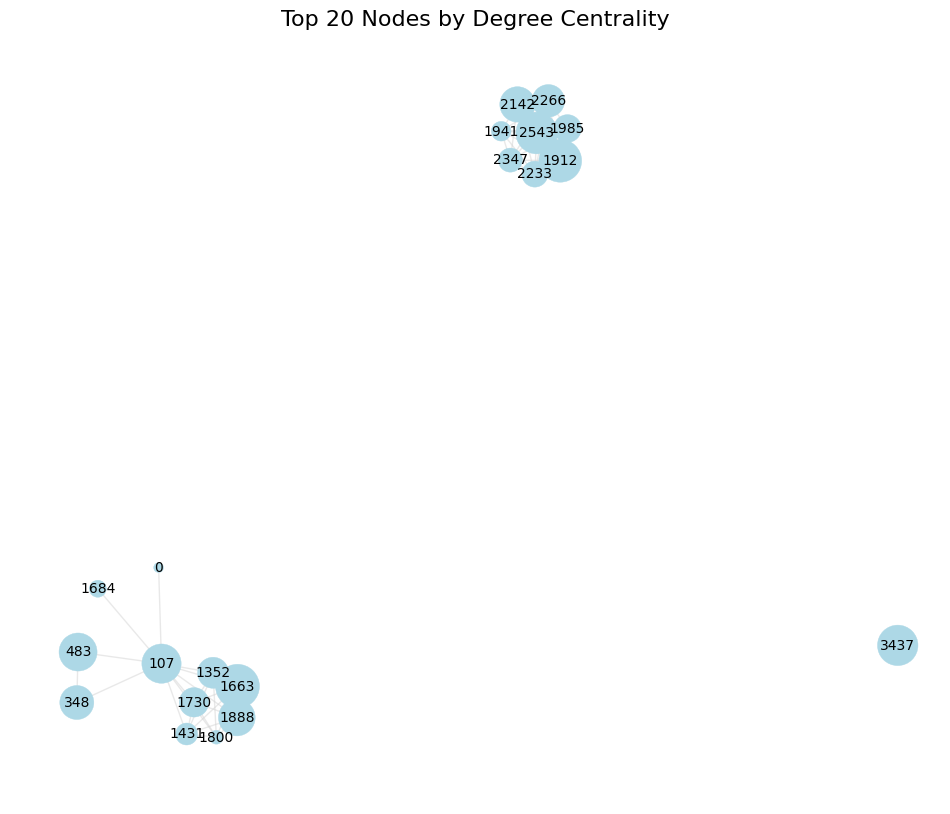



Degree Centrality: {0: 0.08593363051015354, 1: 0.004210004952947003, 2: 0.0024764735017335313, 3: 0.004210004952947003, 4: 0.0024764735017335313, 5: 0.0032194155522535907, 6: 0.0014858841010401188, 7: 0.004952947003467063, 8: 0.001981178801386825, 9: 0.014115898959881128, 10: 0.0024764735017335313, 11: 0.00024764735017335313, 12: 0.00024764735017335313, 13: 0.007677067855373947, 14: 0.003714710252600297, 15: 0.00024764735017335313, 16: 0.002228826151560178, 17: 0.0032194155522535907, 18: 0.00024764735017335313, 19: 0.00396235760277365, 20: 0.003714710252600297, 21: 0.016097077761267953, 22: 0.0027241208519068845, 23: 0.004210004952947003, 24: 0.00396235760277365, 25: 0.017087667161961365, 26: 0.016840019811788013, 27: 0.0012382367508667657, 28: 0.0032194155522535907, 29: 0.0032194155522535907, 30: 0.004210004952947003, 31: 0.005695889053987122, 32: 0.0014858841010401188, 33: 0.0004952947003467063, 34: 0.0012382367508667657, 35: 0.0004952947003467063, 36: 0.0027241208519068845, 37: 0.

In [3]:
degree_centrality = nx.degree_centrality(G)
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 Nodes by Degree Centrality:")
for node, centrality in top_degree:
    print(f"Node {node}: {centrality:.4f}")
print("\n")
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:20]
top_nodes = [node for node, _ in top_degree]
subgraph = G.subgraph(top_nodes)
pos = nx.spring_layout(subgraph)
plt.figure(figsize=(12, 10))
nx.draw_networkx_edges(subgraph, pos, alpha=0.5, edge_color='lightgray')
node_sizes = [(rank + 1) * 50 for rank in range(len(top_nodes))]
nx.draw_networkx_nodes(subgraph, pos, node_size=node_sizes, node_color='lightblue')
nx.draw_networkx_labels(subgraph, pos, font_size=10, font_color='black')
plt.title('Top 20 Nodes by Degree Centrality', fontsize=16)
plt.axis('off')
plt.show()
print("\n\nDegree Centrality:", degree_centrality)

Top 10 Nodes by Betweenness Centrality:
Node 107: 0.4805
Node 1684: 0.3378
Node 3437: 0.2361
Node 1912: 0.2293
Node 1085: 0.1490
Node 0: 0.1463
Node 698: 0.1153
Node 567: 0.0963
Node 58: 0.0844
Node 428: 0.0643




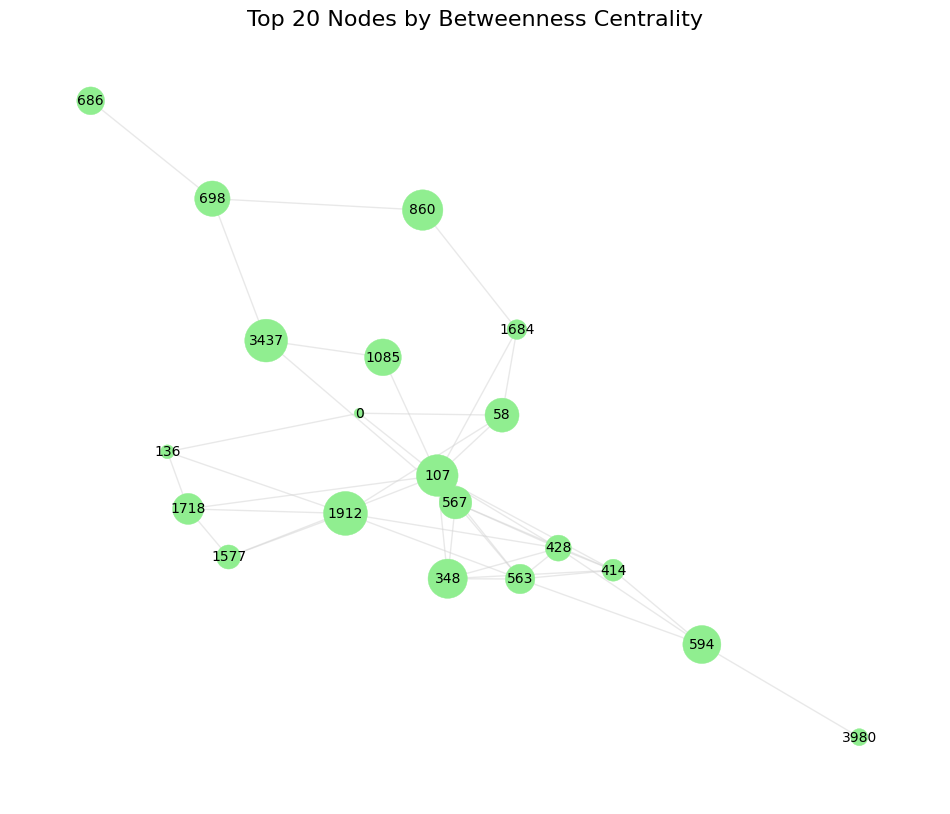



Betweenness Centrality: {0: 0.14630592147442917, 1: 2.7832744209034606e-06, 2: 7.595021178512074e-08, 3: 1.6850656559280464e-06, 4: 1.8403320547933104e-07, 5: 2.205964164092193e-06, 6: 2.4537760730577472e-08, 7: 0.0001702984836730339, 8: 2.7604980821899654e-07, 9: 1.6454236303026905e-05, 10: 4.986739552037655e-08, 11: 0.0, 12: 0.0, 13: 1.7622717578436846e-06, 14: 5.582871686568508e-07, 15: 0.0, 16: 1.9979459275532697e-07, 17: 4.1066669000480344e-07, 18: 0.0, 19: 5.062957964075819e-06, 20: 6.793693332142838e-07, 21: 0.0009380243844653233, 22: 6.703002200833232e-07, 23: 6.860348937590618e-06, 24: 1.3673472422981514e-07, 25: 5.38808313945586e-05, 26: 1.935436798204632e-05, 27: 3.067220091322184e-08, 28: 3.812160659244892e-07, 29: 1.3954817951917517e-06, 30: 1.3694627409316544e-06, 31: 4.932641252790837e-06, 32: 0.0, 33: 0.0, 34: 0.0036020881281963652, 35: 0.0, 36: 2.726417858953052e-08, 37: 0.0, 38: 7.344481172858835e-07, 39: 9.548632622274015e-07, 40: 1.3796059569123122e-05, 41: 4.6732

In [4]:
betweenness_centrality = nx.betweenness_centrality(G)
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 Nodes by Betweenness Centrality:")
for node, centrality in top_betweenness:
    print(f"Node {node}: {centrality:.4f}")
print("\n")
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:20]
top_nodes = [node for node, _ in top_betweenness]
subgraph = G.subgraph(top_nodes)
pos = nx.spring_layout(subgraph)
plt.figure(figsize=(12, 10))
nx.draw_networkx_edges(subgraph, pos, alpha=0.5, edge_color='lightgray')
node_sizes = [(rank + 1) * 50 for rank in range(len(top_nodes))]
nx.draw_networkx_nodes(subgraph, pos, node_size=node_sizes, node_color='lightgreen')
nx.draw_networkx_labels(subgraph, pos, font_size=10, font_color='black')
plt.title('Top 20 Nodes by Betweenness Centrality', fontsize=16)
plt.axis('off')
plt.show()
print("\n\nBetweenness Centrality:", betweenness_centrality)

Top 10 Nodes by Closeness Centrality:
Node 107: 0.4597
Node 58: 0.3974
Node 428: 0.3948
Node 563: 0.3939
Node 1684: 0.3936
Node 171: 0.3705
Node 348: 0.3699
Node 483: 0.3698
Node 414: 0.3695
Node 376: 0.3666




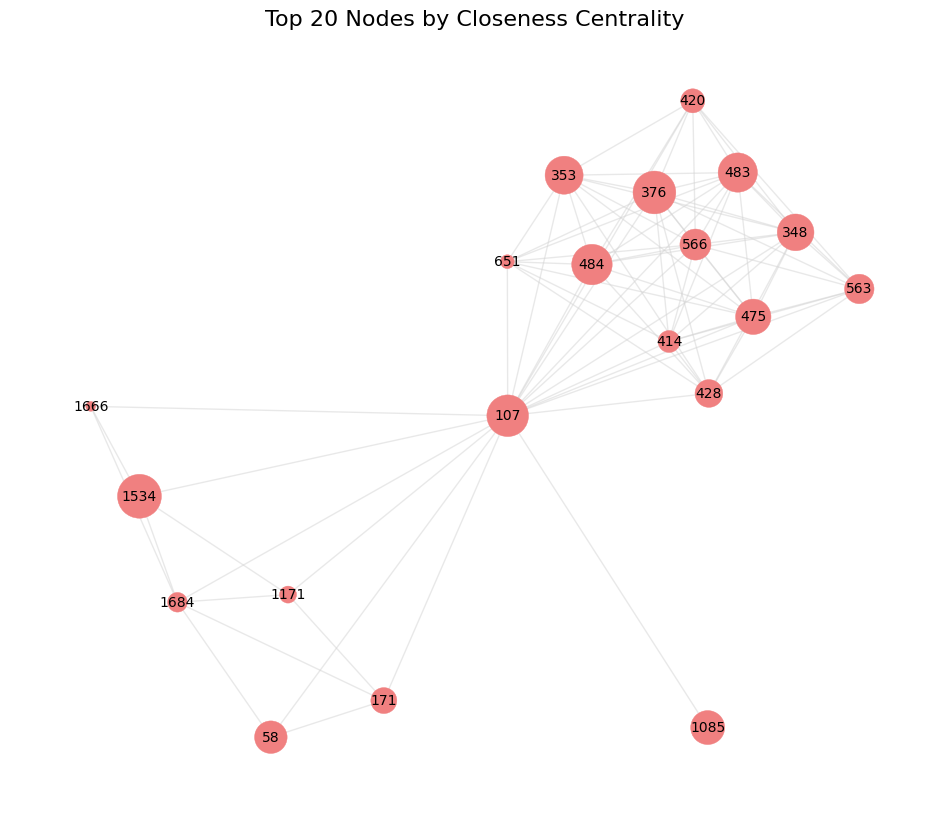



Closeness Centrality: {0: 0.35334266713335666, 1: 0.2613761408505405, 2: 0.26125776397515527, 3: 0.2613761408505405, 4: 0.26125776397515527, 5: 0.2613084837895554, 6: 0.26119016817593793, 7: 0.2747686445291236, 8: 0.2612239617026782, 9: 0.2620546433902265, 10: 0.26125776397515527, 11: 0.26110572259941806, 12: 0.26110572259941806, 13: 0.26161321671525756, 14: 0.2613423079412336, 15: 0.26110572259941806, 16: 0.2612408617454875, 17: 0.2613084837895554, 18: 0.26110572259941806, 19: 0.2613592233009709, 20: 0.2613423079412336, 21: 0.2756125861715924, 22: 0.2612746683921061, 23: 0.2613761408505405, 24: 0.2613592233009709, 25: 0.26225888160031174, 26: 0.26224184959085595, 27: 0.2611732746911584, 28: 0.2613084837895554, 29: 0.2613084837895554, 30: 0.2613761408505405, 31: 0.2614776921582594, 32: 0.26119016817593793, 33: 0.26112260734609416, 34: 0.3033125516412529, 35: 0.26112260734609416, 36: 0.2612746683921061, 37: 0.26110572259941806, 38: 0.2612408617454875, 39: 0.2613423079412336, 40: 0.261

In [5]:
closeness_centrality = nx.closeness_centrality(G)
top_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 Nodes by Closeness Centrality:")
for node, centrality in top_closeness:
    print(f"Node {node}: {centrality:.4f}")
print("\n")
top_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:20]
top_nodes = [node for node, _ in top_closeness]
subgraph = G.subgraph(top_nodes)
pos = nx.spring_layout(subgraph)
plt.figure(figsize=(12, 10))
nx.draw_networkx_edges(subgraph, pos, alpha=0.5, edge_color='lightgray')
node_sizes = [(rank + 1) * 50 for rank in range(len(top_nodes))]
nx.draw_networkx_nodes(subgraph, pos, node_size=node_sizes, node_color='lightcoral')
nx.draw_networkx_labels(subgraph, pos, font_size=10, font_color='black')
plt.title('Top 20 Nodes by Closeness Centrality', fontsize=16)
plt.axis('off')
plt.show()
print("\n\nCloseness Centrality:", closeness_centrality)

Top 10 Nodes by Eigenvector Centrality:
Node 1912: 0.0954
Node 2266: 0.0870
Node 2206: 0.0861
Node 2233: 0.0852
Node 2464: 0.0843
Node 2142: 0.0842
Node 2218: 0.0842
Node 2078: 0.0841
Node 2123: 0.0837
Node 1993: 0.0835




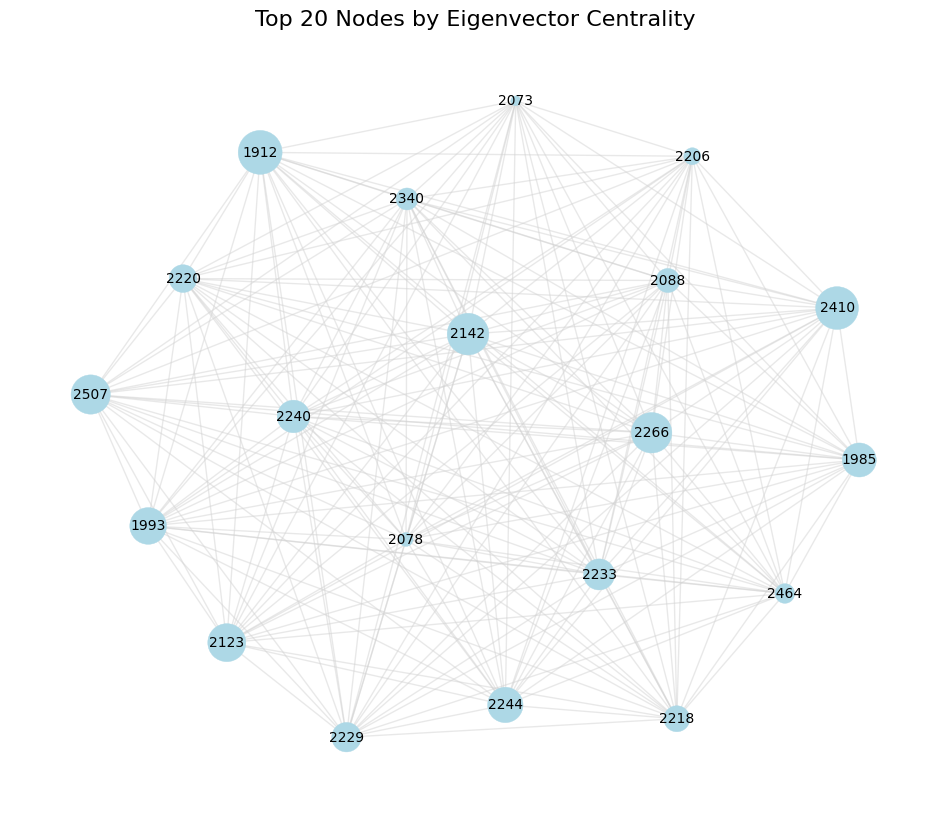



Eigenvector Centrality: {0: 3.391796172270201e-05, 1: 6.045346134948107e-07, 2: 2.2334609371911966e-07, 3: 6.635648083921052e-07, 4: 2.2364157028893605e-07, 5: 1.1833221118435216e-06, 6: 2.1709041695161263e-07, 7: 2.568510124822489e-05, 8: 2.1973746334830285e-07, 9: 2.214116624486093e-06, 10: 7.708567044092624e-07, 11: 2.1031233303459666e-07, 12: 2.1031233303459666e-07, 13: 1.103790547598573e-06, 14: 2.3055679294325335e-07, 15: 2.1031233303459666e-07, 16: 2.616513592117462e-07, 17: 2.2774170298520142e-07, 18: 2.1031233303459666e-07, 19: 2.3149092118602842e-07, 20: 2.3038875741121886e-07, 21: 2.5965755464539663e-05, 22: 1.0365420550578182e-06, 23: 2.327855955467465e-07, 24: 2.4875636881516775e-07, 25: 2.0920477409908786e-06, 26: 2.333621078244131e-06, 27: 3.8500493368810947e-07, 28: 2.276328150659143e-07, 29: 2.9276633115487333e-07, 30: 9.62912044010581e-07, 31: 1.4530295555049823e-06, 32: 2.172656002138456e-07, 33: 2.1162712130634827e-07, 34: 4.074184547679874e-06, 35: 2.117140285304

In [6]:
eigenvector_centrality = nx.eigenvector_centrality(G)
top_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 Nodes by Eigenvector Centrality:")
for node, centrality in top_eigenvector:
    print(f"Node {node}: {centrality:.4f}")
print("\n")
top_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:20]
top_nodes = [node for node, _ in top_eigenvector]
subgraph = G.subgraph(top_nodes)
pos = nx.spring_layout(subgraph)
plt.figure(figsize=(12, 10))
nx.draw_networkx_edges(subgraph, pos, alpha=0.5, edge_color='lightgray')
node_sizes = [(rank + 1) * 50 for rank in range(len(top_nodes))]
nx.draw_networkx_nodes(subgraph, pos, node_size=node_sizes, node_color='lightblue')
nx.draw_networkx_labels(subgraph, pos, font_size=10, font_color='black')
plt.title('Top 20 Nodes by Eigenvector Centrality', fontsize=16)
plt.axis('off')
plt.show()
print("\n\nEigenvector Centrality:", eigenvector_centrality)

Top 10 Nodes by PageRank:
Node 3437: 0.0076
Node 107: 0.0069
Node 1684: 0.0064
Node 0: 0.0063
Node 1912: 0.0039
Node 348: 0.0023
Node 686: 0.0022
Node 3980: 0.0022
Node 414: 0.0018
Node 698: 0.0013




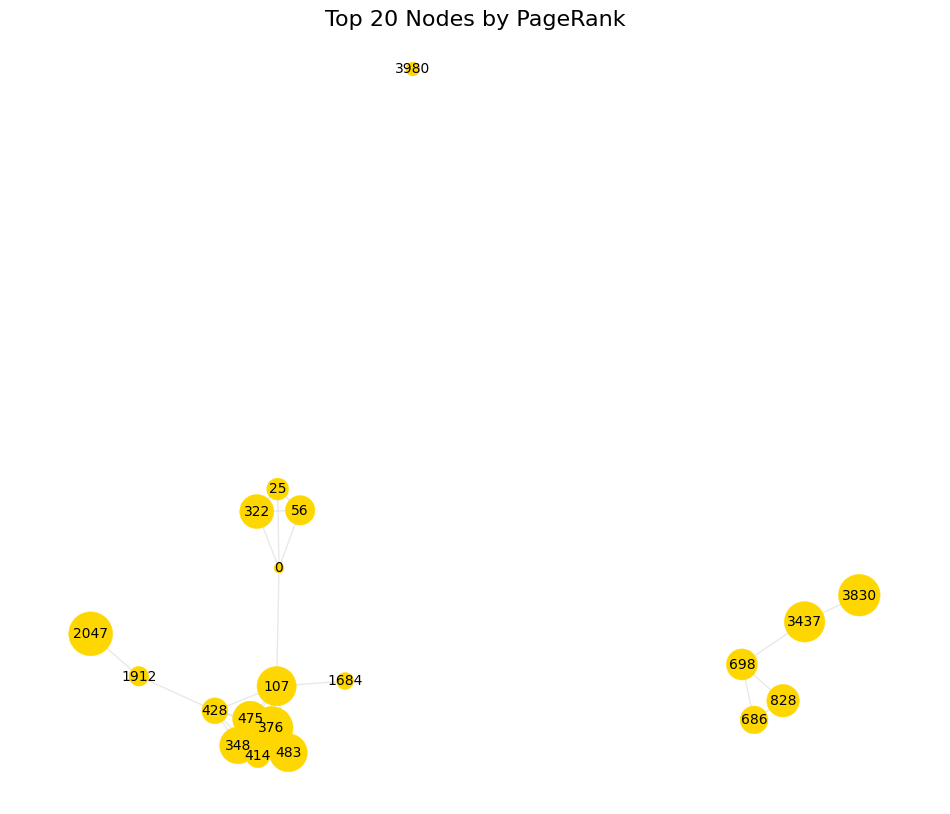



Page Rank: {0: 0.006289602618466542, 1: 0.0002359020231154097, 2: 0.00020310565091694564, 3: 0.00022552359869430614, 4: 0.00023849264701222467, 5: 0.00020234812068977809, 6: 0.00018001867135639642, 7: 0.00026267667111515796, 8: 0.00023737300152657922, 9: 0.0006001572433028075, 10: 0.00013504865958890368, 11: 5.2591423276218314e-05, 12: 5.2591423276218314e-05, 13: 0.00033064195762307644, 14: 0.00028864398034146046, 15: 5.2591423276218314e-05, 16: 0.00013324305769198052, 17: 0.00026000987429524483, 18: 5.2591423276218314e-05, 19: 0.0003806431405636217, 20: 0.00029297537600066995, 21: 0.0006928319433106635, 22: 0.00016385672869526872, 23: 0.0004043263404882842, 24: 0.00022824011209266327, 25: 0.0008004126605197682, 26: 0.0006922746319436038, 27: 9.900477693053426e-05, 28: 0.0002552192093758929, 29: 0.00019154955480122385, 30: 0.00021219645131216377, 31: 0.0002993619581806597, 32: 0.0001478893714943048, 33: 9.172093610965165e-05, 34: 9.248443396698942e-05, 35: 7.353643512923526e-05, 36: 

In [7]:
pagerank = nx.pagerank(G)
top_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 Nodes by PageRank:")
for node, rank in top_pagerank:
    print(f"Node {node}: {rank:.4f}")
print("\n")
top_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:20]
top_nodes = [node for node, _ in top_pagerank]
subgraph = G.subgraph(top_nodes)
pos = nx.spring_layout(subgraph)
plt.figure(figsize=(12, 10))
nx.draw_networkx_edges(subgraph, pos, alpha=0.5, edge_color='lightgray')
node_sizes = [(rank + 1) * 50 for rank in range(len(top_nodes))]
nx.draw_networkx_nodes(subgraph, pos, node_size=node_sizes, node_color='gold')
nx.draw_networkx_labels(subgraph, pos, font_size=10, font_color='black')
plt.title('Top 20 Nodes by PageRank', fontsize=16)
plt.axis('off')
plt.show()
print("\n\nPage Rank:", pagerank)

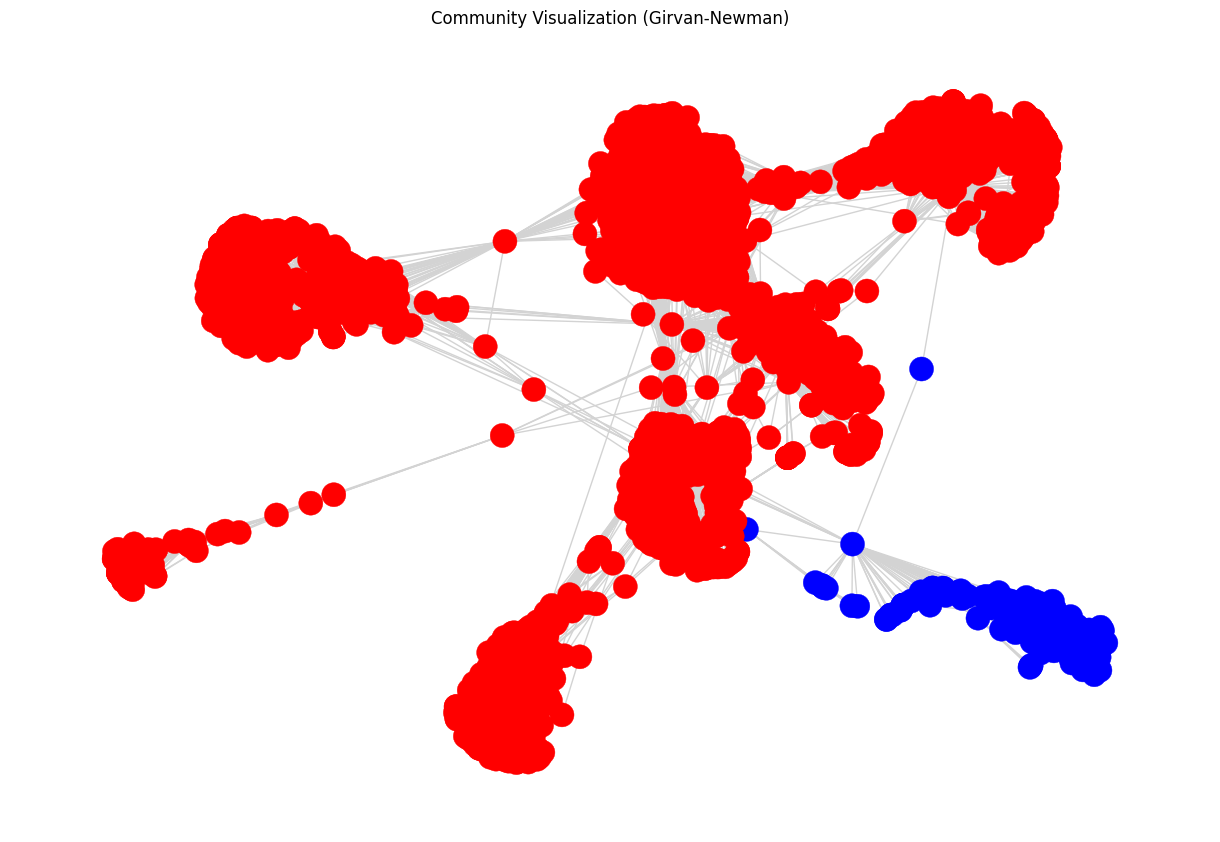

Communities (Girvan-Newman): [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

In [6]:
communities = girvan_newman(G)
first_level_communities = next(communities)
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color=[community_colors[node] for node in G.nodes()], with_labels=False, edge_color='lightgray')
plt.title("Community Visualization (Girvan-Newman)")
plt.show()
print("Communities (Girvan-Newman):", [list(c) for c in first_level_communities])

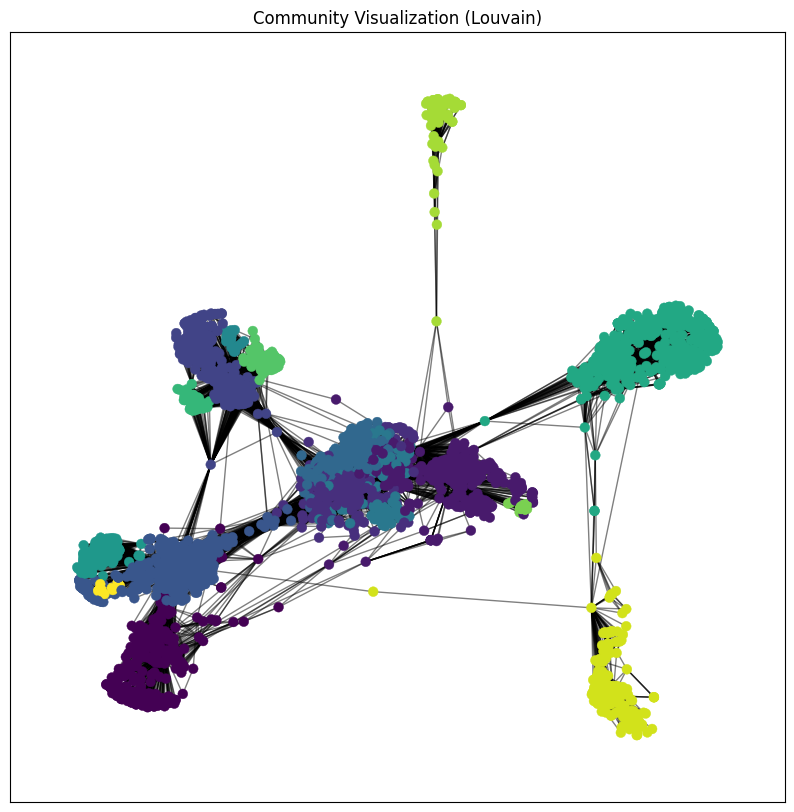

Community (Louvain): {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 1, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0, 101: 0, 102: 0, 103: 0, 104: 0, 105: 0, 106: 0, 107: 2, 108: 0, 109: 0, 110: 0, 111: 0, 112: 0, 113: 0, 114: 0, 115: 0, 116: 0, 117: 0, 118: 0, 119: 0, 120: 0, 121: 0, 122: 0, 123: 0, 124: 0, 125: 0, 126: 0, 127: 0, 128: 0, 129: 0, 130: 0, 131: 0, 132: 0, 133: 0, 134: 0, 135: 0, 

In [9]:
partition = community_louvain.best_partition(G)
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
colors = [partition[node] for node in G.nodes()]
cmap = plt.get_cmap("viridis")
nx.draw_networkx_nodes(G, pos, node_size=50, cmap=cmap, node_color=colors)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title("Community Visualization (Louvain)")
plt.show()
print("Community (Louvain):", partition)

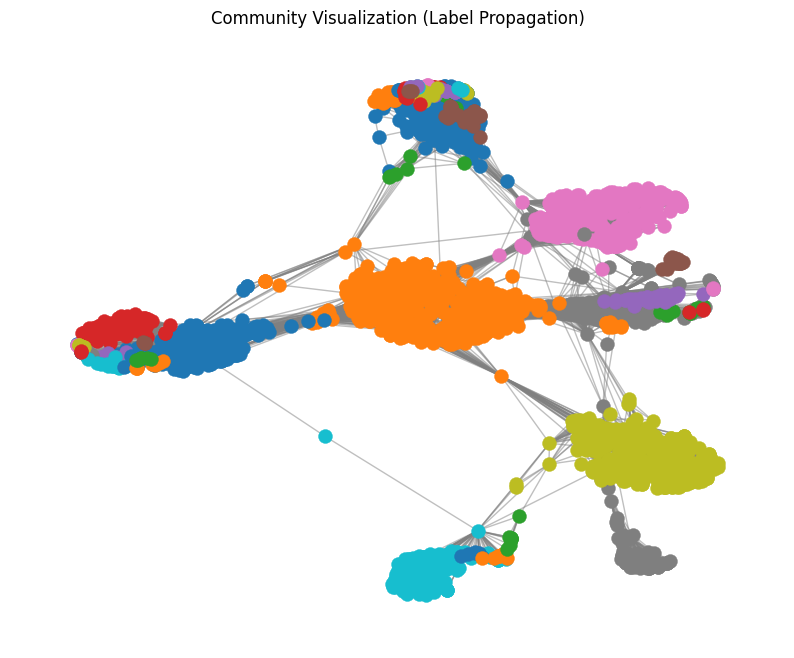

Communities (Label Propagation): [[0, 1, 3, 5, 7, 9, 10, 11, 12, 13, 15, 16, 18, 21, 22, 23, 25, 26, 27, 29, 30, 31, 37, 38, 39, 40, 43, 45, 47, 48, 50, 51, 54, 55, 56, 59, 60, 61, 62, 63, 65, 66, 67, 69, 72, 73, 74, 75, 76, 77, 79, 81, 82, 83, 84, 85, 87, 88, 96, 98, 103, 104, 105, 106, 109, 113, 114, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 128, 129, 130, 132, 133, 134, 141, 142, 146, 148, 153, 155, 156, 157, 158, 160, 161, 164, 165, 166, 168, 169, 170, 172, 176, 178, 183, 185, 186, 188, 190, 191, 199, 200, 202, 203, 206, 207, 208, 209, 210, 211, 212, 213, 215, 221, 222, 223, 224, 228, 229, 231, 232, 234, 235, 236, 237, 238, 239, 240, 246, 247, 248, 250, 252, 257, 258, 260, 261, 265, 267, 268, 269, 270, 271, 272, 274, 276, 277, 280, 283, 285, 286, 287, 288, 290, 291, 292, 294, 295, 297, 298, 301, 303, 304, 308, 311, 313, 314, 315, 316, 317, 318, 322, 323, 324, 325, 329, 331, 332, 334, 335, 336, 338, 339, 340, 341, 342, 344, 345, 347], [2, 262, 137, 138, 140, 14, 144, 17, 19,

In [10]:
communities = list(label_propagation_communities(G))
communities = list(nx.community.label_propagation_communities(G))
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(10, 8))
colors = plt.cm.tab10.colors
for i, community in enumerate(communities):
    nx.draw_networkx_nodes(G, pos, nodelist=list(community), 
                           node_color=[colors[i % len(colors)]], node_size=100)
nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color="gray")
plt.title("Community Visualization (Label Propagation)")
plt.axis('off')
plt.show()
print("Communities (Label Propagation):", [list(c) for c in communities])

In [11]:
density = nx.density(G)
print("Graph Density:", density)
if nx.is_connected(G):
    diameter = nx.diameter(G)
    radius = nx.radius(G)
    print("\nNetwork Diameter:", diameter)
    print("\nNetwork Radius:", radius)
else:
    print("\nGraph is not connected; diameter and radius are undefined.")
global_clustering = nx.average_clustering(G)
print("\nGlobal Clustering Coefficient:", global_clustering)
k_core = nx.k_core(G)
print("\nk-Core Decomposition:", k_core.nodes())
local_clustering = nx.clustering(G)
print("\nLocal Clustering Coefficient:", local_clustering)

Graph Density: 0.010819963503439287

Network Diameter: 8

Network Radius: 4

Global Clustering Coefficient: 0.6055467186200862

k-Core Decomposition: [2560, 2561, 2564, 2059, 2573, 2063, 2064, 2578, 2069, 2073, 2074, 2586, 2078, 2590, 2593, 2083, 2551, 2086, 2088, 2600, 2090, 2601, 2602, 2093, 2604, 2095, 2607, 2611, 2103, 2104, 2615, 2619, 2108, 2109, 2112, 2624, 2625, 2115, 2118, 2630, 2121, 2122, 2123, 2124, 2638, 2131, 2139, 2140, 2142, 2654, 2655, 2150, 2154, 2172, 2184, 2188, 2190, 2200, 2201, 2206, 2212, 2216, 2218, 2220, 2229, 2233, 2240, 2244, 2253, 2257, 2266, 2271, 2275, 2276, 2278, 2290, 2299, 2307, 2308, 2309, 2323, 2324, 2326, 2331, 2339, 2340, 2347, 2348, 2352, 2354, 2356, 2359, 2363, 2369, 2370, 2374, 2376, 2381, 2386, 2395, 2404, 2408, 2409, 2410, 2414, 2423, 1912, 2428, 1917, 1918, 2430, 2433, 1929, 2446, 1938, 1943, 1946, 2460, 2464, 2467, 2468, 2469, 1962, 1966, 2482, 1971, 2485, 1979, 2492, 1983, 1984, 1985, 1986, 2495, 2500, 2504, 1993, 2507, 1997, 2005, 2520, 252

In [8]:
node_a = int(input("Enter the ID of the starting node: "))
node_b = int(input("Enter the ID of the target node: "))
try:
    shortest_path_dijkstra = nx.dijkstra_path(G, node_a, node_b)
    print(f"Shortest Path from {node_a} to {node_b} (Dijkstra):", shortest_path_dijkstra)
except nx.NetworkXNoPath:
    print(f"No path exists between node {node_a} and node {node_b} using Dijkstra's algorithm.")
except nx.NodeNotFound as e:
    print(e)
try:
    shortest_path_bfs = nx.shortest_path(G, node_a, node_b)
    print(f"Shortest Path from {node_a} to {node_b} (BFS):", shortest_path_bfs)
except nx.NetworkXNoPath:
    print(f"No path exists between node {node_a} and node {node_b} using BFS.")
except nx.NodeNotFound as e:
    print(e)

Enter the ID of the starting node:  0
Enter the ID of the target node:  10


Shortest Path from 0 to 10 (Dijkstra): [0, 10]
Shortest Path from 0 to 10 (BFS): [0, 10]


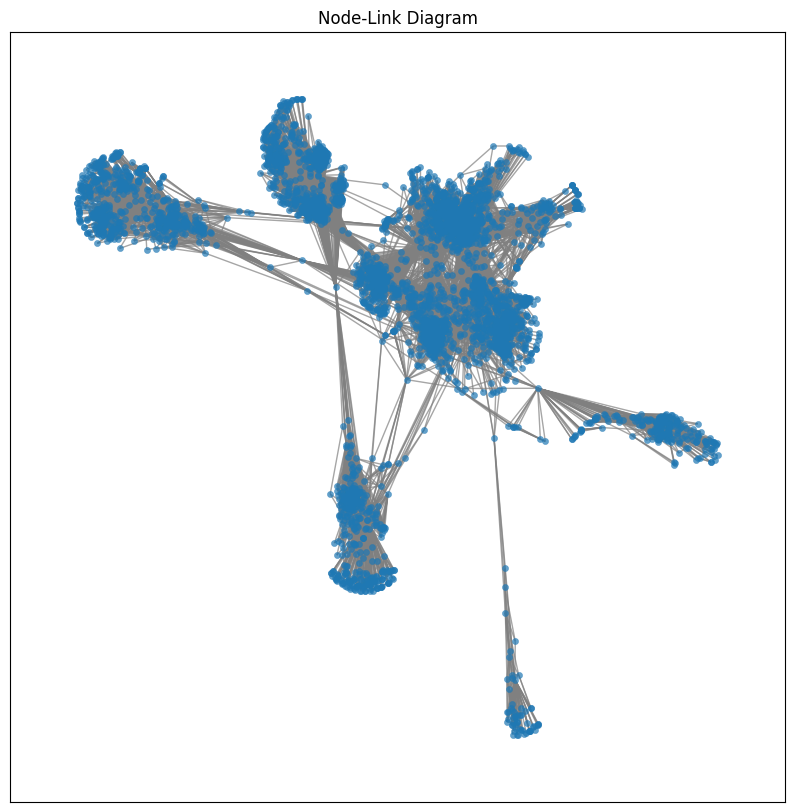

In [13]:
plt.figure(figsize=(10, 10))
nx.draw_networkx(G, with_labels=False, node_size=20, edge_color="grey", alpha=0.7)
plt.title("Node-Link Diagram")
plt.show()

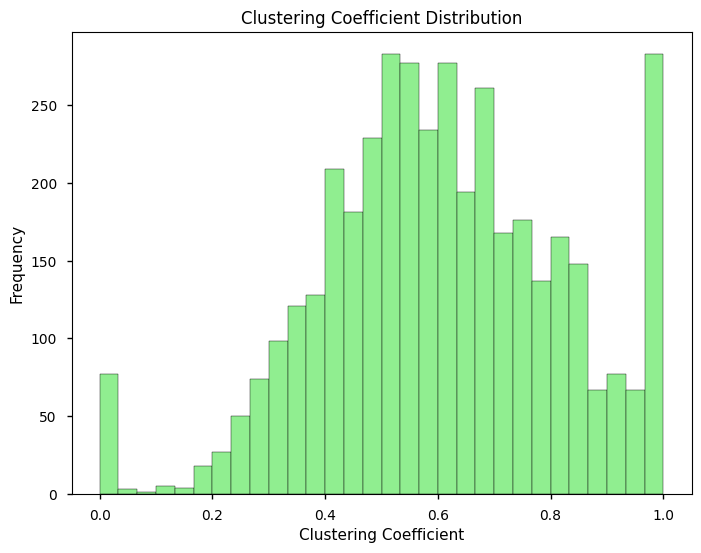

In [14]:
clustering_values = list(local_clustering.values())
plt.figure(figsize=(8, 6))
plt.hist(clustering_values, bins=30, color="lightgreen", edgecolor="black")
plt.title("Clustering Coefficient Distribution")
plt.xlabel("Clustering Coefficient")
plt.ylabel("Frequency")
plt.show()

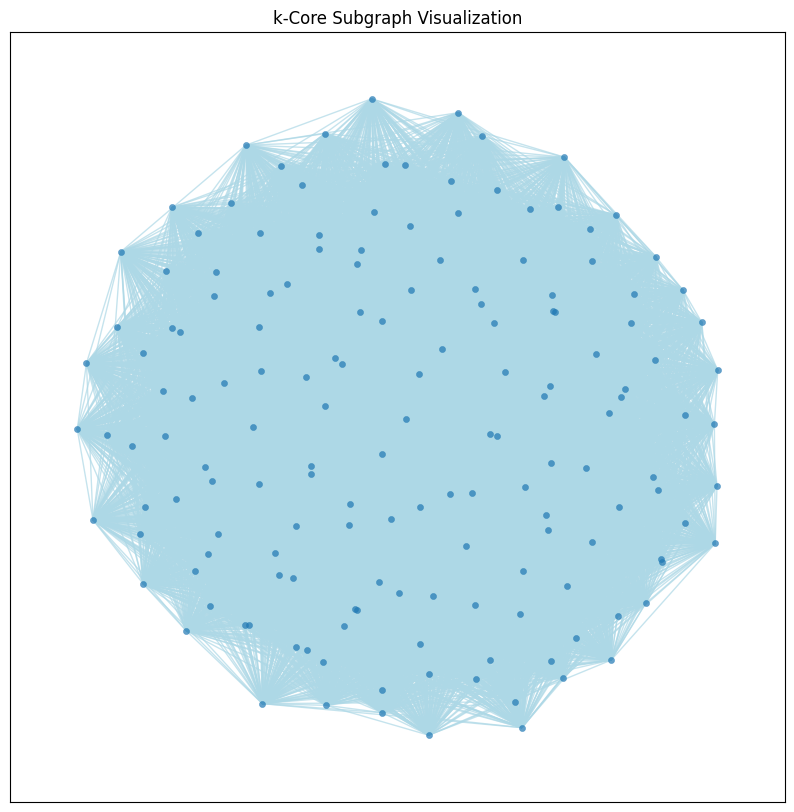

In [17]:
k_core_subgraph = nx.k_core(G)
plt.figure(figsize=(10, 10))
nx.draw_networkx(k_core_subgraph, with_labels=False, node_size=20, edge_color="lightblue", alpha=0.7)
plt.title("k-Core Subgraph Visualization")
plt.show()